In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import snakecase

In [2]:
# 1. Open the categoricals variable we created before.
categoricals = pd.read_csv('categoricals_df.csv',index_col=0)
categoricals.head()

state  response  coverage  education employment_status  gender  \
0  Washington         0         1          2          Employed       0   
1     Arizona         0         2          2        Unemployed       0   
2      Nevada         0         3          2          Employed       0   
3  California         0         1          2        Unemployed       1   
4  Washington         0         1          2          Employed       1   

  location_code marital_status     policy_type  policy sales_channel  \
0      Suburban        Married  Corporate Auto       3         Agent   
1      Suburban         Single   Personal Auto       3         Agent   
2      Suburban        Married   Personal Auto       3         Agent   
3      Suburban        Married  Corporate Auto       2   Call Center   
4         Rural         Single   Personal Auto       1         Agent   

   vehicle_class  vehicle_size  
0   Two-Door Car             2  
1  Four-Door Car             2  
2   Two-Door Car             2  
3            SUV             2  
4  Four-Door Car             2

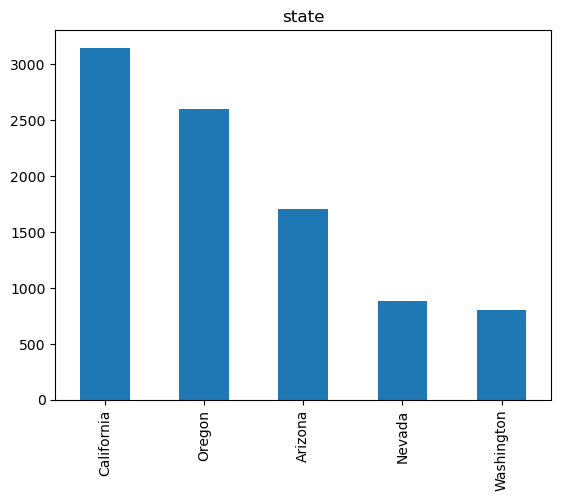

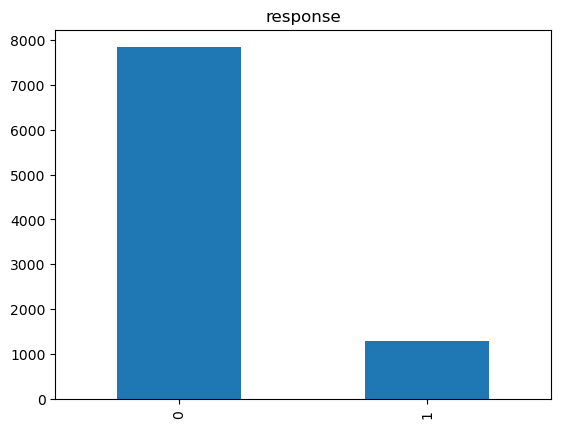

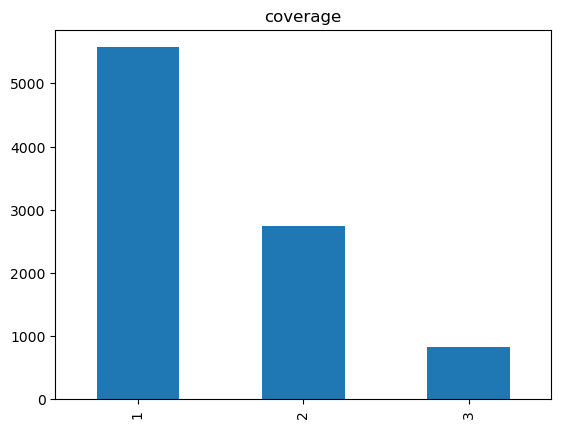

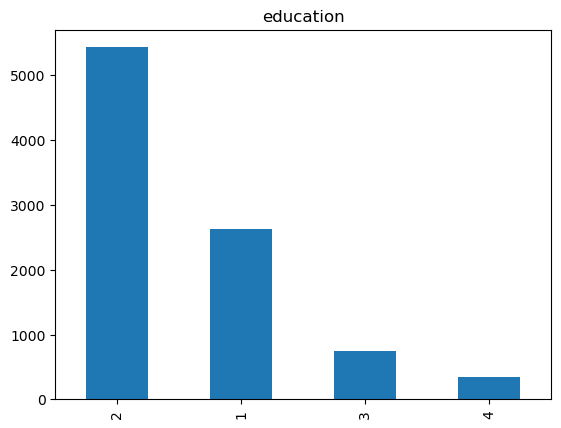

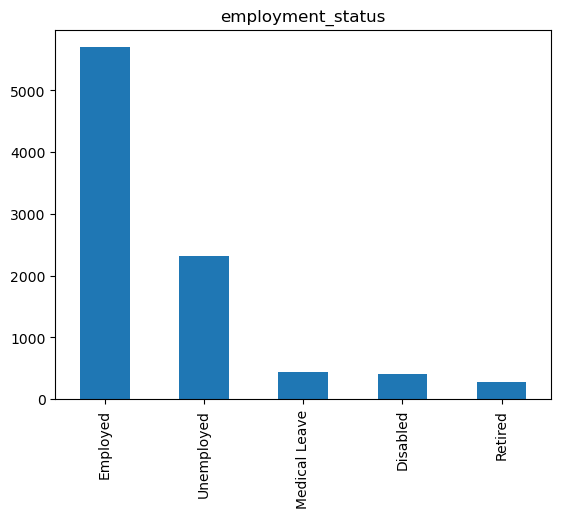

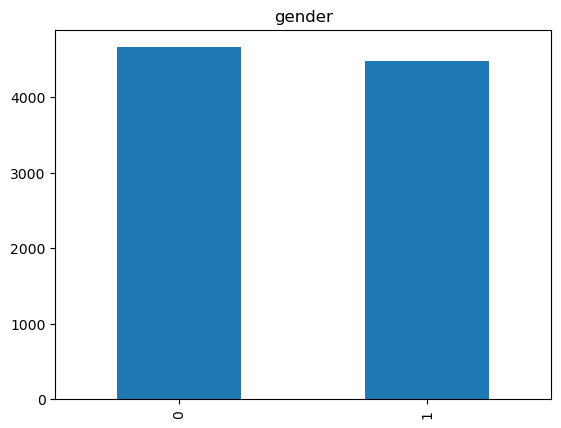

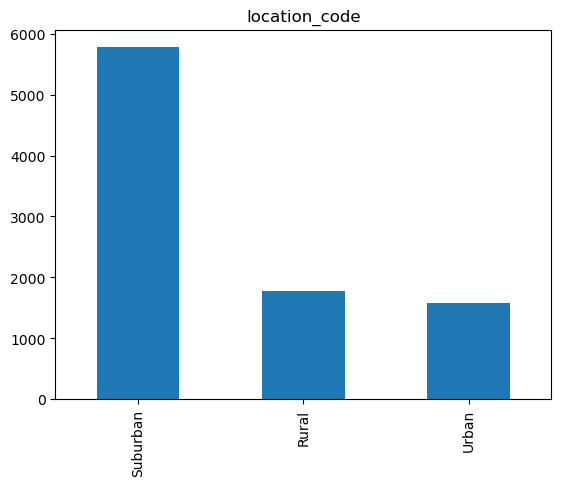

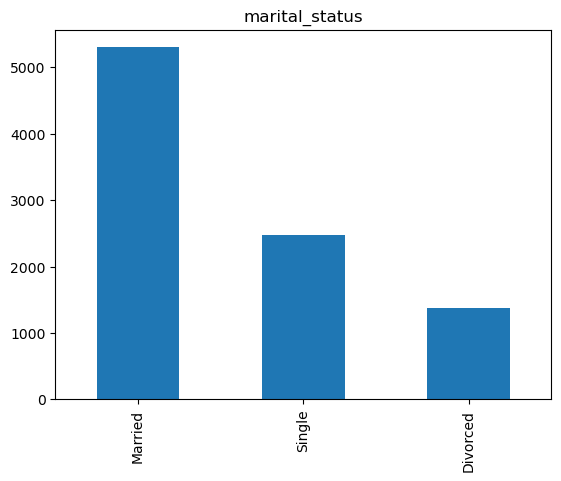

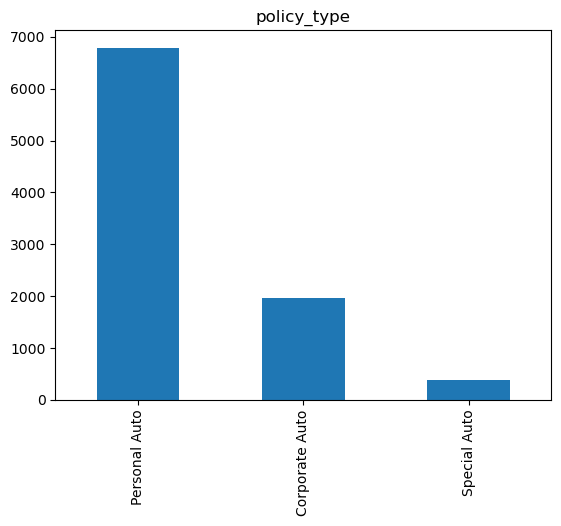

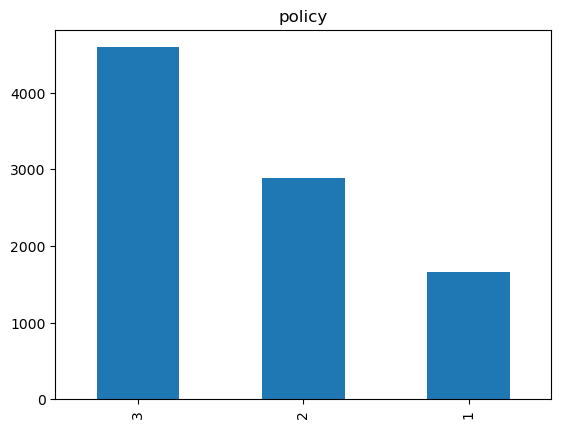

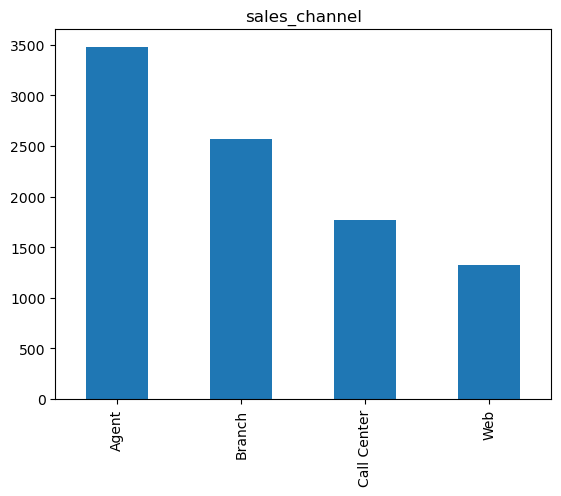

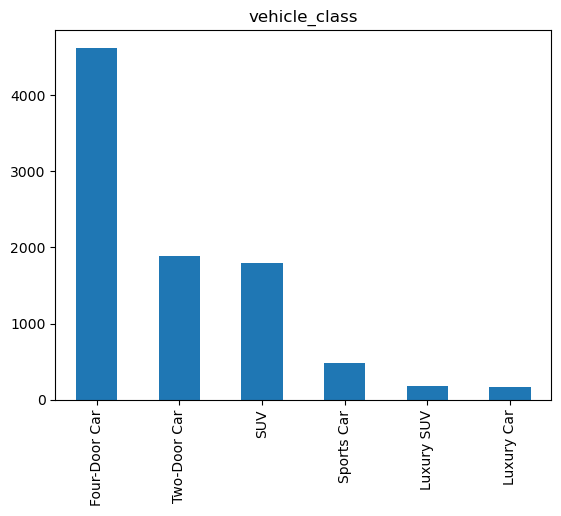

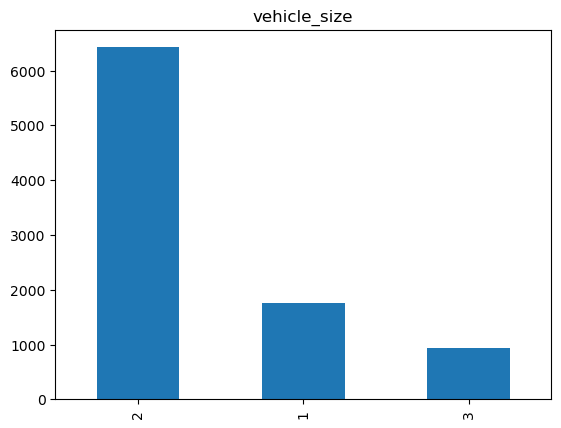

In [3]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
for col in categoricals.columns:
    plt.figure()
    categoricals[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [4]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns = [snakecase.convert(col.replace(' ','_')).replace('__','_') for col in customer_df.columns]

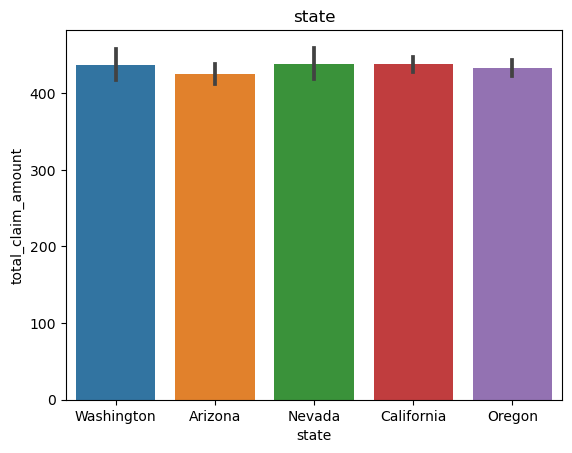

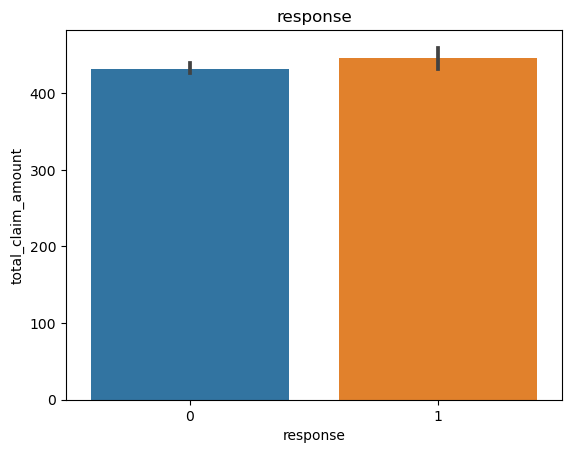

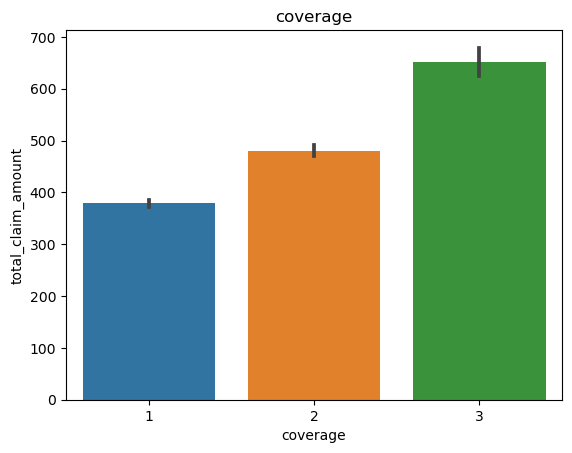

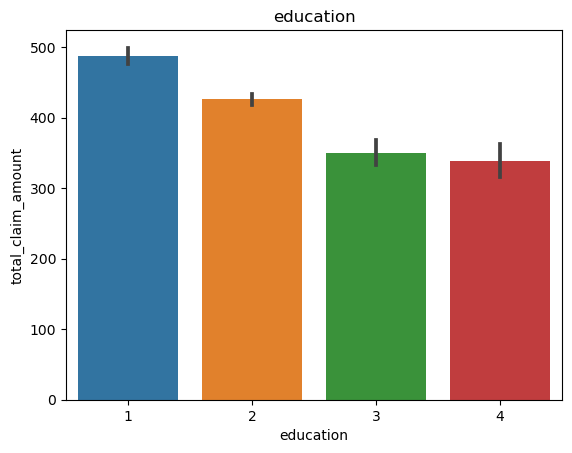

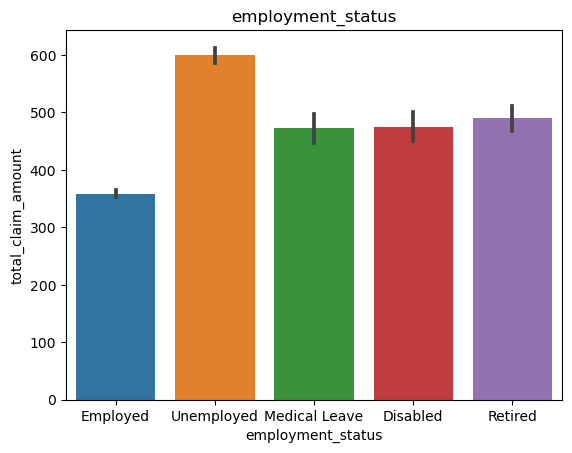

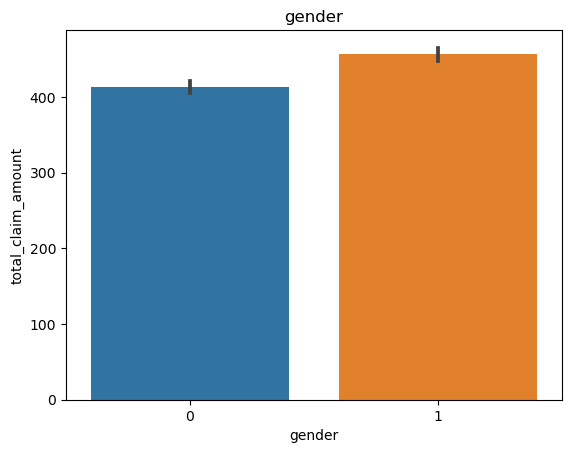

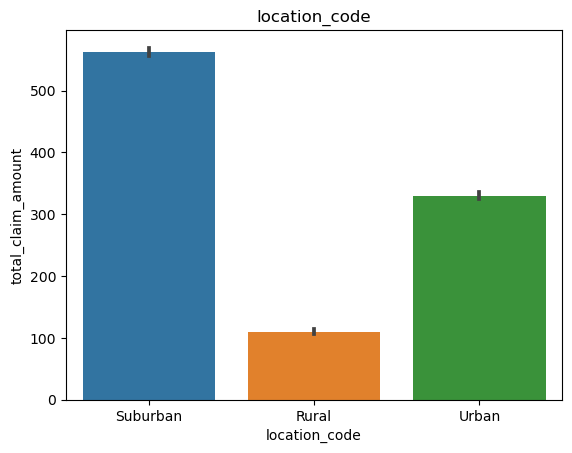

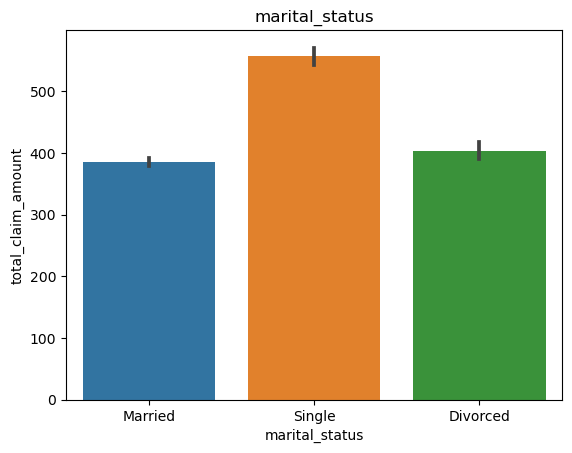

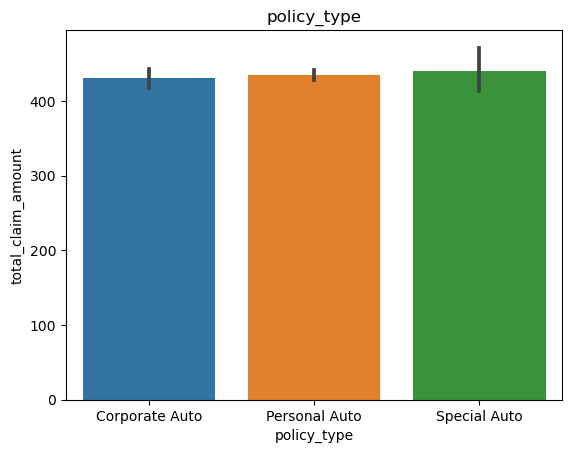

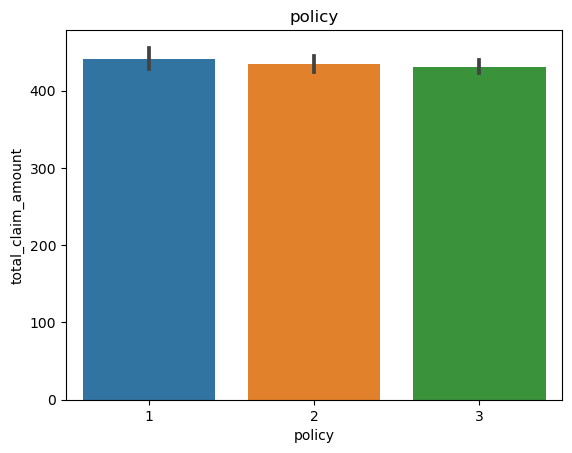

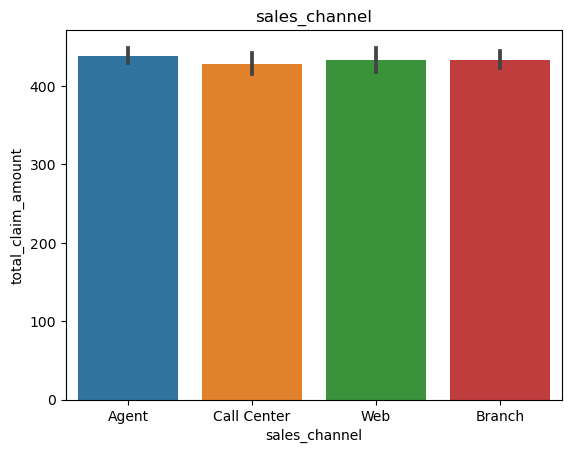

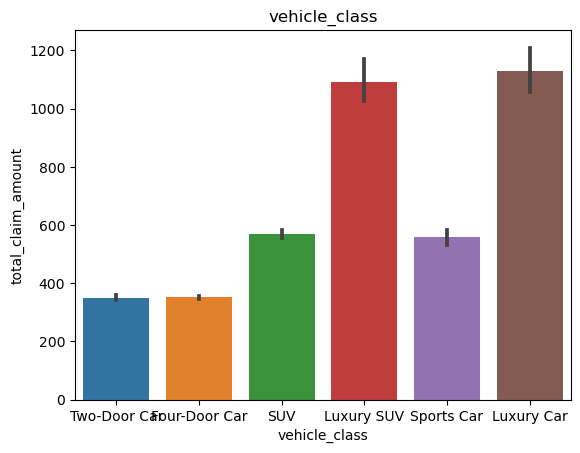

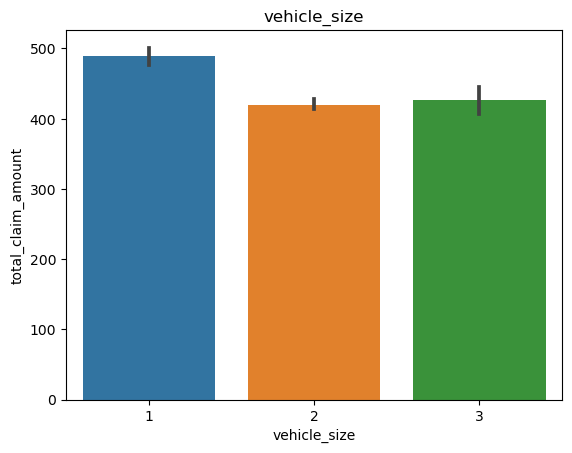

In [5]:
for col in categoricals.columns:
    sns.barplot(x=categoricals[col],y=customer_df['total_claim_amount'])
    plt.title(col)
    plt.show()

In [6]:
categoricals_2 = categoricals.drop(columns=['state', 'response', 'policy_type', 'policy', 'sales_channel'])

In [7]:
# 4. Plot time variable. Can you extract something from it?
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
customer_df['effective_to_date'].dt.year.value_counts()

2011    9134
Name: effective_to_date, dtype: int64

In [9]:
customer_df['effective_to_date'].dt.month.value_counts()

1    4898
2    4236
Name: effective_to_date, dtype: int64

In [10]:
# customer_df['year'] = customer_df['effective_to_date'].dt.year - not usefull, onlyone year (2011)
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employment_status gender  income  ...  \
0        2011-02-24          Employed      F   56274  ...   
1        2011-01-31        Unemployed      F       0  ...   
2        2011-02-19          Employed      F   48767  ...   
3        2011-01-20        Unemployed      M       0  ...   
4        2011-02-03          Employed      M   43836  ...   

  number_of_open_complaints number_of_policies     policy_type        policy  \
0                         0                  1  Corporate Auto  Corporate L3   
1                         0                  8   Personal Auto   Personal L3   
2                         0                  2   Personal Auto   Personal L3   
3                         0                  7  Corporate Auto  Corporate L2   
4                         0                  1   Personal Auto   Personal L1   

   renew_offer_type  sales_channel  total_claim_amount  vehicle_class  \
0            Offer1          Agent          384.811147   Two-Door Car   
1            Offer3          Agent         1131.464935  Four-Door Car   
2            Offer1          Agent          566.472247   Two-Door Car   
3            Offer1    Call Center          529.881344            SUV   
4            Offer1          Agent          138.130879  Four-Door Car   

  vehicle_size month  
0      Medsize     2  
1      Medsize     1  
2      Medsize     2  
3      Medsize     1  
4      Medsize     2  

[5 rows x 25 columns]

In [11]:
categoricals_2.to_csv('categoricals_df_2.csv')
customer_df.to_csv('customer_df.csv')